In [1]:
cd ..

/home/nzilberstein/repository/constrained_sampling


/home/nzilberstein/anaconda3/envs/stable-dif/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# make sure you're logged in with \`huggingface-cli login\`
# import torch
# import argparse
# import os
from torchvision.utils import make_grid, save_image
import numpy as np
# from PIL import Image
import matplotlib.pyplot as plt
# import os
import hydra
from hydra import initialize, compose
from omegaconf import DictConfig, OmegaConf
import torchvision.transforms as transforms 
from torchvision.datasets import VisionDataset
from torch.utils.data import DataLoader
from typing import Callable, Optional
# import glob
import torch.nn as nn

from datasets import build_loader

import lpips
import torch

from PIL import Image
import lpips

%load_ext autoreload
%autoreload 2

/home/nzilberstein/anaconda3/envs/stable-dif/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load config file
# with initialize(version_base=None, config_path="../_configs"):
#     cfg = compose(config_name='ddrmpp.yaml')

# # Define upsample operation
upsample = nn.Upsample(scale_factor=2, mode='nearest') 

# # Build loader
# loader = build_loader(cfg)
lpips_ = lpips.LPIPS(net='alex').cuda()

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/nzilberstein/anaconda3/envs/stable-dif/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/nzilberstein/anaconda3/envs/stable-dif/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/nzilberstein/anaconda3/envs/stable-dif/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


In [141]:
# get image from loader
stop_at = 100
for it, (x, y, info) in enumerate(loader):
    if it > stop_at:
        break
    print(info['index'][0])
    # save_image(x[0], f'/home/nzilberstein/Inverse/_exp/input/FFHQ/{info['index'][0]}')

00000.png
00001.png
00002.png
00003.png
00004.png
00005.png
00006.png
00007.png
00008.png
00009.png
00010.png
00011.png
00012.png
00013.png
00014.png
00015.png
00016.png
00017.png
00018.png
00019.png
00020.png
00021.png
00022.png
00023.png
00024.png
00025.png
00026.png
00027.png
00028.png
00029.png
00030.png
00031.png
00032.png
00033.png
00034.png
00035.png
00036.png
00037.png
00038.png
00039.png
00040.png
00041.png
00042.png
00043.png
00044.png
00045.png
00046.png
00047.png
00048.png
00049.png
00050.png
00051.png
00052.png
00053.png
00054.png
00055.png
00056.png
00057.png
00058.png
00059.png
00060.png
00061.png
00062.png
00063.png
00064.png
00065.png
00066.png
00067.png
00068.png
00069.png
00070.png
00071.png
00072.png
00073.png
00074.png
00075.png
00076.png
00077.png
00078.png
00079.png
00080.png
00081.png
00082.png
00083.png
00084.png
00085.png
00086.png
00087.png
00088.png
00089.png
00090.png
00091.png
00092.png
00093.png
00094.png
00095.png
00096.png
00097.png
00098.png
00099.png


In [ ]:
x_upsample = upsample(x[0].unsqueeze(0)).squeeze()

plt.figure(1)
plt.imshow(x_upsample.permute(1,2,0).detach().numpy())
print(x_upsample.shape)

plt.figure(2)
plt.imshow(x[0].permute(1,2,0).detach().numpy())

save_image(x_upsample, 'test.png')


In [8]:
img_id_single = '00000'
img_path=f'/home/nzilberstein/Inverse/PSLD/diffusion-posterior-sampling/outputs/inpainting/recon/{img_id_single}.png'
img = Image.open(img_path).convert('RGB')

# img_path_reddif = f'/home/nzilberstein/diffusion-posterior-sampling/outputs/inpainting/recon/00000.png'
# img_reddif = Image.open(img_path_reddif).convert('RGB')

img_true_path = f'/home/nzilberstein/Inverse/_exp/input/FFHQ/{img_id_single}.png'
img_true = Image.open(img_true_path).convert('RGB')

# img_deg = Image.open('/home/nzilberstein/Inverse/_exp/output_inv/x_deg.png').convert('RGB')

In [9]:
img_torch_psld = transforms.ToTensor()(img)
# img_torch_reddif = transforms.ToTensor()(img_reddif)
img_true_torch = transforms.ToTensor()(img_true)
# img_torch_deg = transforms.ToTensor()(img_deg)
# img_true_torch = upsample(img_true_torch.unsqueeze(0)).squeeze()

mse = torch.mean((img_torch_psld - img_true_torch) ** 2, dim=(0, 1, 2))
psnr = 10 * torch.log10(1 / (mse + 1e-10))
print(psnr)

# mse = torch.mean((img_torch_reddif - img_true_torch) ** 2, dim=(0, 1, 2))
# psnr = 10 * torch.log10(1 / (mse + 1e-10))
# print(psnr)
# lpips_(img_torch_psld.cuda(), img_true_torch.cuda()), lpips_(img_torch_reddif.cuda(), img_true_torch.cuda())
lpips_(img_torch_psld.cuda(), img_true_torch.cuda())

tensor(22.6007)


tensor([[[[0.1070]]]], device='cuda:0', grad_fn=<AddBackward0>)

In [7]:
grid = make_grid([img_torch_psld, img_torch_reddif, img_true_torch, img_torch_deg], nrow=4)

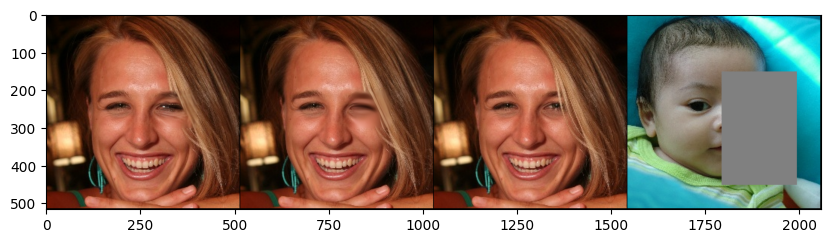

In [8]:
# define figure with size
plt.figure(figsize=(10,10))
plt.imshow(grid.permute(1,2,0).detach().numpy())



save_image(grid, 'results_inp.png')

In [17]:
img_path = '/home/nzilberstein/Inverse/_exp/output_bip/PSLD/samples'
# img_path_input = '/home/nzilberstein/Inverse/_exp/input/FFHQ'
# img_path = '/home/nzilberstein/Inverse/_exp/output_sr8/PSLD/samples'
import os

# Calculate FID score
cnt = 0
mean_psnr = 0
mean_lpips = 0
for item in os.listdir(img_path):
    print(item)
    # Check if the item is a directory (folder)
    img_true_path = os.path.join('/home/nzilberstein/Inverse/_exp/input/FFHQ', item + '.png')
    img_true = Image.open(img_true_path).convert('RGB')
    img_true_torch = transforms.ToTensor()(img_true)
    img_true_torch = upsample(img_true_torch.unsqueeze(0)).squeeze()
    img_psld_torch_list = []
    for img_id in os.listdir(os.path.join(img_path, item)):
        # print(img_id)
        if len(img_id.split('_')) == 1:
            # print(img_id)
            img_id_path = os.path.join(img_path, item, img_id)
            img = Image.open(img_id_path).convert('RGB')

            img_psld_torch = transforms.ToTensor()(img)
            img_psld_torch_list.append(img_psld_torch)
            # Transform to tensor the list
    img_psld_torch_list = torch.stack(img_psld_torch_list)
    # print(img_psld_torch_list.shape)
    # Compute similarity
    total_pair_wise_sim = 0.
    xo_list = dino(img_psld_torch_list)
    # del dino
    xo_list /= xo_list.norm(dim=-1, keepdim=True)
    # calculate the cosine similarity
    sim = (xo_list @ xo_list.T)
    # set the diagonal to be 0
    sim = sim - torch.diag(sim.diag())
    total_pair_wise_sim += sim.sum() / (sim.shape[0] * (sim.shape[0] - 1))
    torch.clear_autocast_cache()
        # print(total_pair_wise_sim)
                            
print(total_pair_wise_sim)

00042


NameError: name 'dino' is not defined

In [5]:
img_path = '/home/nzilberstein/repository/constrained_sampling/_exp/output/PSLD/output_bip_large/samples'
# img_path = '/home/nzilberstein/Inverse/PSLD/stable-diffusion/outputs/psld-samples-bip/samples'
img_id_max = '00035'
import os
from PIL import Image

# Calculate FID score
cnt = 0
mean_psnr = 0
mean_lpips = 0
for item in os.listdir(img_path):
    if item < img_id_max:
        print(item)
        # Check if the item is a directory (folder)
        img_true_path = os.path.join('/home/nzilberstein/Inverse/_exp/input/FFHQ', item + '.png')
        img_true = Image.open(img_true_path).convert('RGB')
        img_true_torch = transforms.ToTensor()(img_true)
        # img_true_torch = upsample(img_true_torch.unsqueeze(0)).squeeze()
        for img_id in os.listdir(os.path.join(img_path, item)):
            # print(img_id.split('.')[0].split('_'))
            if len(img_id.split('.')[0].split('_')) > 1:
                print(img_id)
                img_id_path = os.path.join(img_path, item, img_id)
                img = Image.open(img_id_path).convert('RGB')

                img_psld_torch = transforms.ToTensor()(img)

                mse = torch.mean((img_psld_torch - img_true_torch) ** 2, dim=(0, 1, 2))
                psnr = 10 * torch.log10(1 / (mse + 1e-10))
                mean_psnr = mean_psnr + psnr

                lpips_val = lpips_(img_psld_torch.cuda(), img_true_torch.cuda())
                # print(lpips_val)
                mean_lpips = mean_lpips + lpips_val

                cnt = cnt + 1
            

print(mean_psnr/cnt)
print(mean_lpips/cnt)

00024
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00033
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00027
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00008
00012_low_res.png
00013_low_res.png
00014_low_res.png
00015_low_res.png
00004
00012_low_res.png
00013_low_res.png
00014_low_res.png
00015_low_res.png
00017
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00012
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00003
00012_low_res.png
00013_low_res.png
00014_low_res.png
00015_low_res.png
00002
00012_low_res.png


00013_low_res.png
00014_low_res.png
00015_low_res.png
00025
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00009
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00010
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00026
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00001
00012_low_res.png
00013_low_res.png
00014_low_res.png
00015_low_res.png
00028
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00023
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00021
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00011
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00030
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00032
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00031
00006_low_res.png
00005_low_res.png
00007_low_res.png
00004_low_res.png
00005
0001

In [28]:
'00001' < '00006'

True

## REDDIF

In [29]:
img_path = '/home/nzilberstein/repository/constrained_sampling/_exp/output/reddiff'
img_path_input = '/home/nzilberstein/repository/constrained_sampling/_exp/input/FFHQ'
coeff = 0.0
import os
import torch
from PIL import Image

dino = torch.hub.load('facebookresearch/dino:main', 'dino_vits16')
dino = dino.eval()
# Calculate diversity
cnt = 0
mean_psnr = 0
mean_lpips = 0
for item in os.listdir(img_path_input):
    if item.split('.')[0] < '00040':
        # Check if the item is a directory (folder)
        img_psld_torch_list = []    
        for img_id in os.listdir(os.path.join(img_path, item.split('.')[0], f'{coeff}')):
            if (img_id.split('_')[2]).split('.')[0] != 'grid':
                img_id_path = os.path.join(img_path, item.split('.')[0], f'{coeff}', img_id)
                img = Image.open(img_id_path).convert('RGB')

                img_psld_torch = transforms.ToTensor()(img)
                img_psld_torch_list.append(img_psld_torch)
                # Transform to tensor the list
        img_psld_torch_list = torch.stack(img_psld_torch_list)
        # print(img_psld_torch_list.shape)
        # Compute similarity
        total_pair_wise_sim = 0.
        xo_list = dino(img_psld_torch_list)
        # del dino
        xo_list /= xo_list.norm(dim=-1, keepdim=True)
        # calculate the cosine similarity
        sim = (xo_list @ xo_list.T)
        # set the diagonal to be 0
        sim = sim - torch.diag(sim.diag())
        total_pair_wise_sim += sim.sum() / (sim.shape[0] * (sim.shape[0] - 1))
        torch.clear_autocast_cache()
        # print(total_pair_wise_sim)
                            
print(total_pair_wise_sim)

Using cache found in /home/nzilberstein/.cache/torch/hub/facebookresearch_dino_main


KeyboardInterrupt: 

In [19]:
img_path = '/home/nzilberstein/repository/constrained_sampling/_exp/output/rsd_stable/inp'
img_path_input = '/home/nzilberstein/repository/constrained_sampling/_exp/input/FFHQ'
coeff = 0.0
import os
import lpips
import os
import torch
from PIL import Image


# Calculate FID score
cnt = 0
mean_psnr = 0
mean_lpips = 0
for item in os.listdir(img_path_input):
    if item.split('.')[0] < '00004':
        print(item)
        # Check if the item is a directory (folder)
        img_true_path = os.path.join(img_path_input, item)
        # print(item)
        img_true = Image.open(img_true_path).convert('RGB')
        img_true_torch = transforms.ToTensor()(img_true)
        img_true_torch = upsample(img_true_torch.unsqueeze(0)).squeeze()
        for img_id in os.listdir(os.path.join(img_path, item.split('.')[0], '0')):
            if img_id.split('_')[2] == "grid.png":
                continue
            img_id_path = os.path.join(img_path, item.split('.')[0], '0', img_id)
            img = Image.open(img_id_path).convert('RGB')

            img_psld_torch = transforms.ToTensor()(img)

            mse = torch.mean((img_psld_torch - img_true_torch) ** 2, dim=(0, 1, 2))
            psnr = 10 * torch.log10(1 / (mse + 1e-10))
            mean_psnr = mean_psnr + psnr

            lpips_val = lpips_(img_psld_torch.cuda(), img_true_torch.cuda())
            mean_lpips = mean_lpips + lpips_val

            cnt = cnt + 1
            


print(mean_psnr/cnt)
print(mean_lpips/cnt)

00001.png
00003.png
00002.png
00000.png
tensor(26.2775)
tensor([[[[0.0931]]]], device='cuda:0', grad_fn=<DivBackward0>)


In [ ]:
img_path = '/home/nzilberstein/Inverse/_exp/output_bip_small_nonaugm/RED_diff_nonaug'
it = 0
for item in os.listdir(img_path_input):
    # Check if the item is a directory (folder)
    if item.isnumeric():
        print(item)
        list_imgs = os.listdir(os.path.join(img_path_input, item))
        idx_img = np.random.choice(len(os.listdir(os.path.join(img_path_input, item))))
        img_true = Image.open(os.path.join(args.dir_path, item, list_imgs[idx_img])).convert('RGB')

        img_torch = transforms.ToTensor()(img_true)

        # Create folder if does not exist
        if not os.path.exists(dest_folder):
            os.makedirs(dest_folder)

        save_image(img_torch, f'{dest_folder}/{it}.png')
    it = it + 1


In [ ]:
# /home/nicolas/red_diff_stable/PSLD/stable-diffusion/outputs/psld-samples-bip/samples/00002.png
from PIL import Image
import lpips
# img_path = '/home/nzilberstein/Inverse/_exp/output_rip/PSLD/samples/00003/00000.png'
img_id_single = '00010'
img_path = f'/home/nzilberstein/Inverse/PSLD/stable-diffusion/outputs/psld-samples-bip/samples/{img_id_single}/00000.png'
# img_path = f'/home/nzilberstein/Inverse/_exp/output_rip/PSLD/samples_500_iter/{img_id_single}/00000.png'
img = Image.open(img_path).convert('RGB')

img_path_reddif = f'/home/nzilberstein/Inverse/_exp/output_rip/RED_diff/10.0/x_hat_1.png'
# img_path_reddif = f'/home/nzilberstein/Inverse/_exp/output_rip/RED_diff/{img_id_single}/0.0/x_hat_1.png'
img_reddif = Image.open(img_path_reddif).convert('RGB')

img_true_path = f'/home/nzilberstein/Inverse/_exp/input/FFHQ/{img_id_single}.png'
# img_true_path = '/home/nzilberstein/PSLD/diffusion-posterior-sampling/data/samples/00003.png'
img_true = Image.open(img_true_path).convert('RGB')

img_deg = Image.open('/home/nzilberstein/Inverse/_exp/output_inv/x_deg.png').convert('RGB')
# Define upsample operation
upsample = nn.Upsample(scale_factor=2, mode='nearest') 